# 准备工作

加载所有需要的包

In [1]:
import pandas as pd
import numpy as np
from mysystem.backtest import internal_data_loader, factor_constructor, factor_test

欢迎使用回测系统
因子Momentem22被打回，原因是“缺乏insight”，请您尽快修改，感谢理解


加载内部数据

In [2]:
fin_stat = internal_data_loader.load_3sheets()
pctdf,data = internal_data_loader.load_processed_prices()

# Secton 1. 因子研究

对五日反转策略进行回测，默认显示简略的回测结果

In [3]:
def rolling5(df):
    return df['pct'].rolling(5).mean()

# factor = factor_constructor.get_price_factor(data,rolling5,start,end)
factor = factor_constructor.get_price_factor(data,rolling5)
returns = factor_test.single_factor_backtest(pctdf,factor,num_bins=5)

factor_test.show(returns)

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合年化-3.30%，波动16.06%，夏普-0.21，回撤35.03%
纯多头超额收益-0.04%, 多头年化-12.18%，波动21.89%，夏普-0.56，回撤48.04%
RankIC均值-0.0048，RankIC标准差0.1195，IC均值0.0065，IC标准差0.1192，T统计量1.4682，显著性水平(p-value)0.0712


尝试向因子库提交因子

In [4]:
factor_test.submit(factor,returns,'momentum','动量因子:移动五日平均')

正在检验相关性和收益情况
最大相关性:0.310
收益过低！拒绝入库


在show函数中，使用“detailed=True”  要求系统展示更详细的回测结果

多空组合年化-3.30%，波动16.06%，夏普-0.21，回撤35.03%
纯多头超额收益-0.04%, 多头年化-12.18%，波动21.89%，夏普-0.56，回撤48.04%
RankIC均值-0.0048，RankIC标准差0.1195，IC均值0.0065，IC标准差0.1192，T统计量1.4682，显著性水平(p-value)0.0712


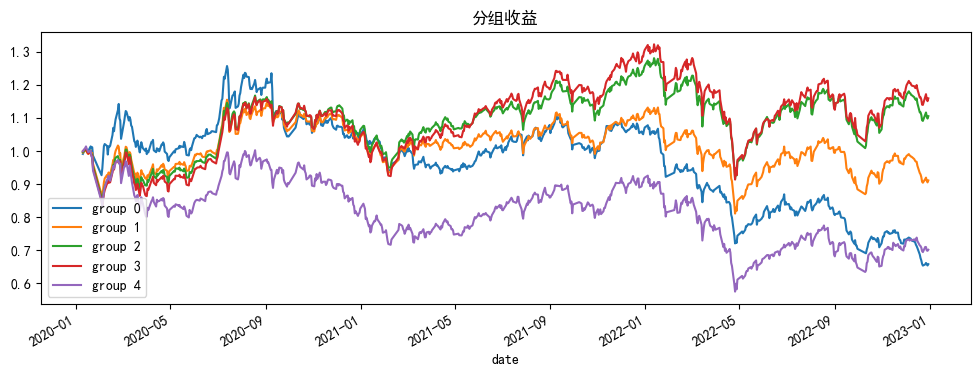

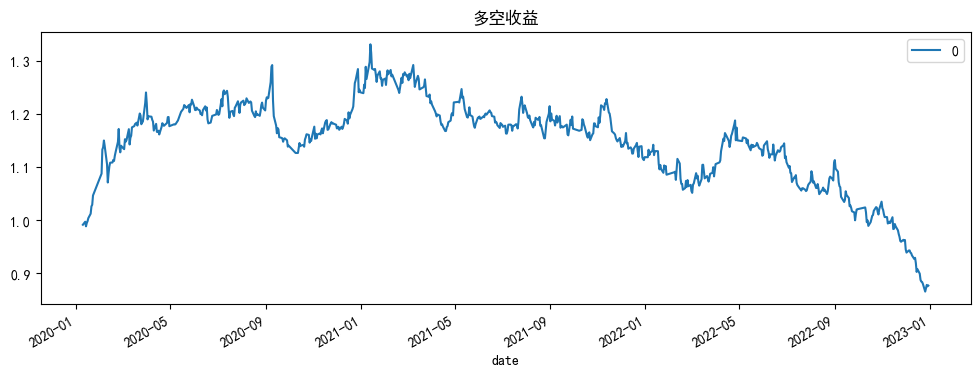

In [4]:
factor_test.show(returns,detailed=True)

对基本面因子进行回测，取商誉与利润相除作为因子(我们认为计提商誉较低的公司财务更“诚实”)

用detailed=True要求系统展示详细结果

正在计算分组收益
正在计算IC
多空组合年化9.94%，波动20.87%，夏普0.48，回撤18.53%
纯多头超额收益0.01%, 多头年化-2.23%，波动26.88%，夏普-0.08，回撤40.25%
RankIC均值0.0017，RankIC标准差0.1812，IC均值0.0090，IC标准差0.2052，T统计量1.1447，显著性水平(p-value)0.1264


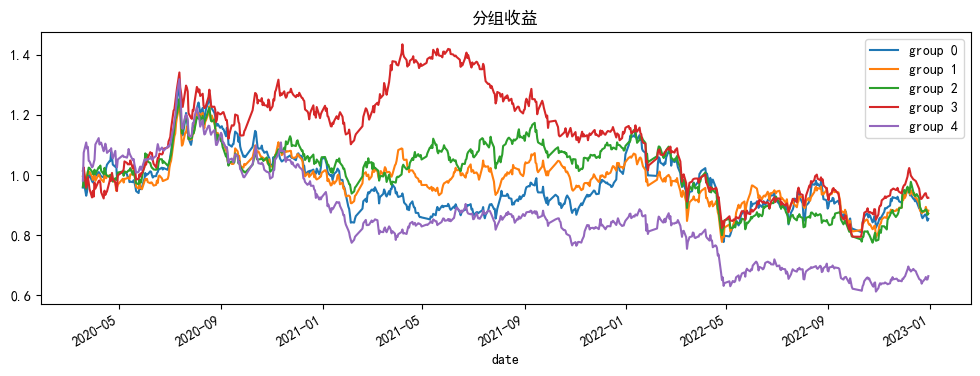

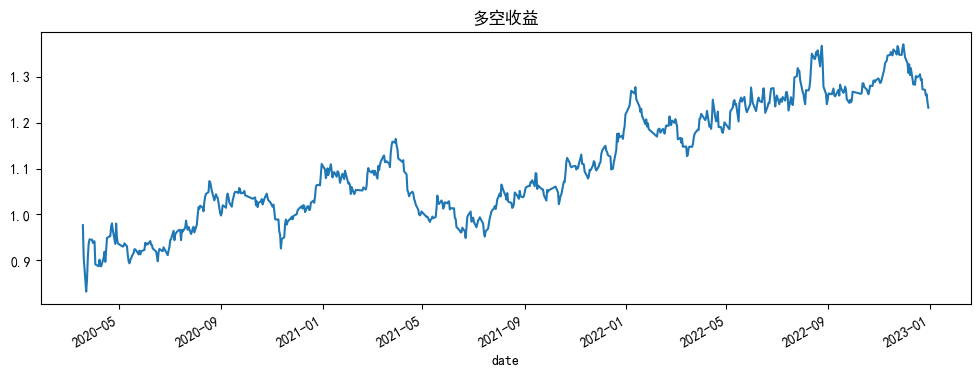

In [8]:
ratio = - factor_constructor.get_finstat_factor(fin_stat,'商誉',pctdf) / factor_constructor.get_finstat_factor(fin_stat,'利润总额',pctdf)

returns = factor_test.single_factor_backtest(pctdf,ratio,num_bins=5)

factor_test.show(returns,detailed=True)

尝试向因子库提交

In [9]:
factor_test.submit(ratio,returns,'fin_stat_0','低商誉计提')

正在检验相关性和收益情况
最大相关性:0.164
Submit Success


一站式服务，忽略内部所有细节，直接用wrapup_test单个函数完成回测

In [11]:
def volume(df):
    return -df['volume'].rolling(66).mean()

factor, results = factor_test.wrapup_test(pctdf,data,volume,require_returns=True)

正在计算量价因子
当前因子构建进度:20%
当前因子构建进度:40%
当前因子构建进度:60%
当前因子构建进度:80%
当前因子构建进度:100%
正在计算分组收益
正在计算IC
多空组合年化16.74%，波动12.19%，夏普1.37，回撤10.97%
纯多头超额收益0.02%, 多头年化5.93%，波动20.08%，夏普0.30，回撤34.90%
RankIC均值0.0070，RankIC标准差0.0946，IC均值0.0061，IC标准差0.0711，T统计量2.2042，显著性水平(p-value)0.0139


In [12]:
factor_test.submit(factor,results,'volume','成交量')

正在检验相关性和收益情况
最大相关性:1.000
相关性过高！拒绝入库


尝试重复提交这个因子

In [13]:
factor_test.submit(factor,results,'volume','成交量')

正在检验相关性和收益情况
最大相关性:1.000
相关性过高！拒绝入库


# Section 2. 因子库管理

# Section 3. 投资组合研究

In [ ]:
annual_ra_df = result.get_annual_return_statistic()
styles = [
            dict(selector="caption", props=[("font-size", "150%"),
                                            ("text-align", "center")]),
            dict(selector="caption", props=[("caption-side", "bottom")]),
            dict(selector="th", props=[("max-width", "1200px"),
                                       ("text-align", "center")])]
pct_fields = []
float_fields = []
for col in annual_ra_df:
    if '%' in col:
        pct_fields.append(col)
    else:
        float_fields.append(col)
annual_ra_df.style.format("{:.2%}", subset=pct_fields) \
            .format("{:.2}", subset=float_fields) \
            .set_properties(**{'max-width': '1000px', 'font-size': '11pt'}) \
            .set_caption("净值评价") \
            .set_table_styles(styles) \
            .bar(align='mid', color=['#5fba7d', '#d65f5f'])

NameError: name 'result' is not defined